<a href="https://colab.research.google.com/github/gowrisrivani/GowriSriVani_AI_ML/blob/main/AIML_Module_1_Lab_1_Extracting_features_from_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AIML Module 1 - Lab 1
# Extracting features from data





In [2]:
! pip install wikipedia

import wikipedia
import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
import unicodedata
import plotly.express as px
import pandas as pd

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=ca42a378cfb692f537bfe9a163c4ae7a2868560199ee591522b0b6c0333f92cc
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [3]:
topic1 = 'Giraffe'
topic2 = 'Elephant'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('fr')

fr1 = wikipedia.page(topic1).content
fr2 = wikipedia.page(topic2).content

This is what the text looks like:

In [4]:
fr2

'Les éléphants sont des mammifères proboscidiens de la famille des Éléphantidés. Ils correspondent aujourd\'hui à trois espèces réparties en deux genres distincts. L\'éléphant de savane d\'Afrique et l\'éléphant de forêt d\'Afrique, autrefois regroupés sous la même espèce d\'« éléphant d\'Afrique », appartiennent au genre Loxodonta, tandis que l\'éléphant d\'Asie, anciennement appelé « éléphant indien », appartient au genre Elephas. Ils se différencient par certaines caractéristiques anatomiques, les éléphants d\'Asie étant en général plus petits avec des oreilles plus petites, ou encore une différence du bout de la trompe. Ces espèces survivantes font localement l\'objet de programmes ou de projets de réintroduction et de protection.\nLe mot français « éléphant » vient du mot latin elephantus qui tire son origine du grec ἐλέφας / eléphas, « ivoire » ou « éléphant ».\nL\'éléphant apparait dans de nombreuses cultures. Il est symbole de sagesse dans la culture asiatique, connu pour sa mé

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [5]:
def cleanup(text):
  text = text.lower()  # make it lowercase
  text = re.sub('[^a-z]+', '', text) # only keep characters
  return text

In [6]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
fr1 = cleanup(fr1)
fr2 = cleanup(fr2)

In [ ]:
print(eng1)

thegiraffeisalargeafricanhoofedmammalbelongingtothegenusgiraffaitisthetallestlivingterrestrialanimalandthelargestruminantonearthtraditionallygiraffeswerethoughttobeonespeciesgiraffacamelopardaliswithninesubspeciesmostrecentlyresearchersproposeddividingthemintouptoeightextantspeciesduetonewresearchintotheirmitochondrialandnucleardnaaswellasmorphologicalmeasurementssevenotherextinctspeciesofgiraffaareknownfromthefossilrecordthegiraffeschiefdistinguishingcharacteristicsareitsextremelylongneckandlegsitshornlikeossiconesanditsspottedcoatpatternsitisclassifiedunderthefamilygiraffidaealongwithitsclosestextantrelativetheokapiitsscatteredrangeextendsfromchadinthenorthtosouthafricainthesouthandfromnigerinthewesttosomaliaintheeastgiraffesusuallyinhabitsavannahsandwoodlandstheirfoodsourceisleavesfruitsandflowersofwoodyplantsprimarilyacaciaspecieswhichtheybrowseatheightsmostotherherbivorescannotreachlionsleopardsspottedhyenasandafricanwilddogsmaypreyupongiraffesgiraffesliveinherdsofrelatedfemalesan

In [7]:
print(eng2)

elephantsarethelargestlivinglandanimalsthreelivingspeciesarecurrentlyrecognisedtheafricanbushelephanttheafricanforestelephantandtheasianelephanttheyaretheonlysurvivingmembersofthefamilyelephantidaeandtheorderproboscideaextinctrelativesincludemammothsandmastodonsdistinctivefeaturesofelephantsincludealongprobosciscalledatrunktuskslargeearflapspillarlikelegsandtoughbutsensitivegreyskinthetrunkisprehensilebringingfoodandwatertothemouthandgraspingobjectstuskswhicharederivedfromtheincisorteethservebothasweaponsandastoolsformovingobjectsanddiggingthelargeearflapsassistinmaintainingaconstantbodytemperatureaswellasincommunicationafricanelephantshavelargerearsandconcavebackswhereasasianelephantshavesmallerearsandconvexorlevelbackselephantsarescatteredthroughoutsubsaharanafricasouthasiaandsoutheastasiaandarefoundindifferenthabitatsincludingsavannahsforestsdesertsandmarshestheyareherbivorousandtheystaynearwaterwhenitisaccessibletheyareconsideredtobekeystonespeciesduetotheirimpactontheirenvironment

In [8]:
print(fr1)

lagirafegiraffacamelopardalisestuneespcedemammifresongulsartiodactylesdugroupedesruminantsvivantdanslessavanesafricainesetrpanduedutchadjusquenafriquedusudsonnomcommunvientdelarabezarfahmaislanimalfutanciennementappelcamloparddulatincameloparduscontractiondecameluschameauenraisondulongcouetdeparduslopardenraisondestachesrecouvrantsoncorpsaprsdesmillionsdannesdvolutionlagirafeaacquisuneanatomieuniqueavecuncouparticulirementallongquiluipermetnotammentdebrouterhautdanslesarbresneufpopulationssediffrenciantparleursrobesetformesonttdcritesparlesnaturalistesdepuislexixesicleparfoiscommeespcespartentiremaisgnralementconsidrescommesimplessousespcesjusquauxxiesiclecependantlataxonomiedesgirafesestactuellementdbattueparmilesscientifiqueslespceestconsidrecommevulnrableparluicnilyavaitindividusenetilnyenaplusqueensoitunediminutionapprochantenanstymologielesubstantiffminingirafeestunempruntlitaliengiraffaluimmeempruntlarabezurfapourlarabeclassiquezarfadescriptionilsagitdelanimalactuelleplusgrandenh

In [9]:
print(fr2)

leslphantssontdesmammifresproboscidiensdelafamilledeslphantidsilscorrespondentaujourdhuitroisespcesrpartiesendeuxgenresdistinctsllphantdesavanedafriqueetllphantdefortdafriqueautrefoisregroupssouslammeespcedlphantdafriqueappartiennentaugenreloxodontatandisquellphantdasieanciennementappellphantindienappartientaugenreelephasilssediffrencientparcertainescaractristiquesanatomiquesleslphantsdasietantengnralpluspetitsavecdesoreillespluspetitesouencoreunediffrenceduboutdelatrompecesespcessurvivantesfontlocalementlobjetdeprogrammesoudeprojetsderintroductionetdeprotectionlemotfranaislphantvientdumotlatinelephantusquitiresonoriginedugrecelphasivoireoulphantllphantapparaitdansdenombreusesculturesilestsymboledesagessedanslacultureasiatiqueconnupoursammoireetsonintelligencequiestcomparecelledesctacsethominidsaristoteavaitditquellphantestlabtequidpassetouteslesautresparlintelligenceetlespritdescriptionllphantdafriquequipeutatteindretonnesestleplusgrosanimalterrestreactuelmaisilestloinderrirelabaleine

Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [10]:
# convert a tuple of characters to a string
def tuple2string(tup):
  st = ''
  for ii in tup:
    st = st + ii
  return st

# convert a tuple of tuples to a list of strings
def key2string(keys):
  return [tuple2string(i) for i in keys]

# plot the histogram
def plothistogram(ngram):
  keys = key2string(ngram.keys())
  values = list(ngram.values())

  # sort the keys in alphabetic order
  combined = zip(keys, values)
  zipped_sorted = sorted(combined, key=lambda x: x[0])
  keys, values = map(list, zip(*zipped_sorted))
  plt.bar(keys, values)

Let us compare the histograms of English pages and French pages. Can you spot a difference?

ngrams :
Signature: ngrams(sequence, n, **kwargs)
Docstring:
Return the ngrams generated from a sequence of items, as an iterator.
For example:

    >>> from nltk.util import ngrams
    >>> list(ngrams([1,2,3,4,5], 3))
    [(1, 2, 3), (2, 3, 4), (3, 4, 5)]

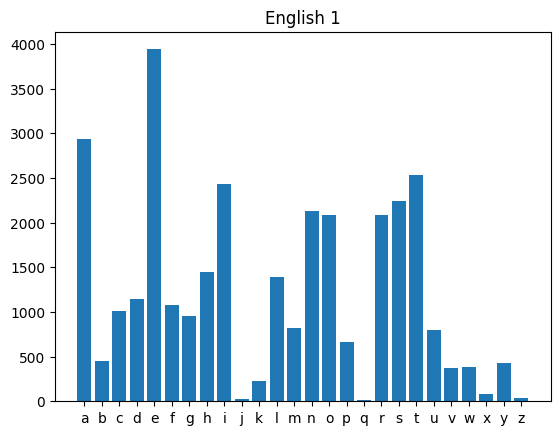

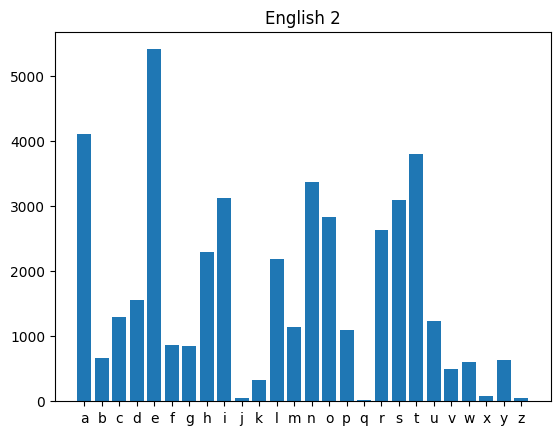

In [14]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

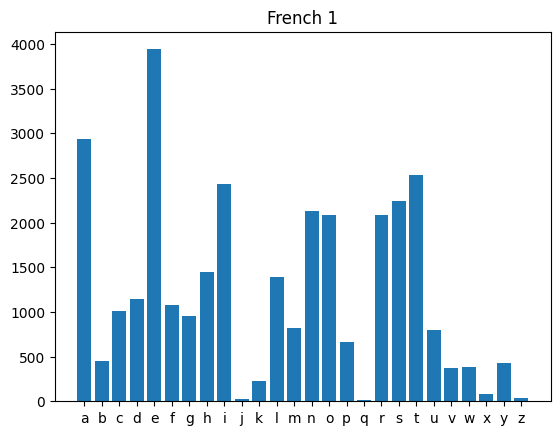

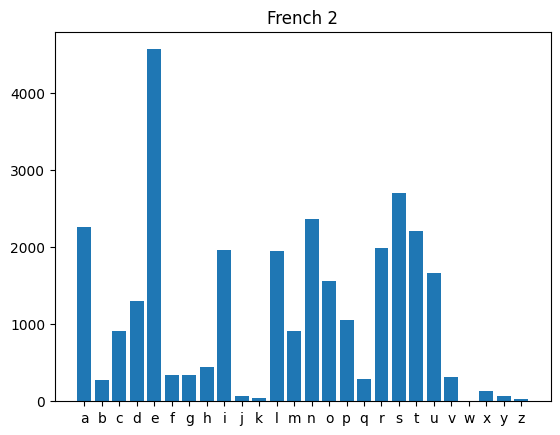

In [13]:
unigram_fr1 = Counter(ngrams(fr1,1))
plothistogram(unigram_eng1)
plt.title('French 1')
plt.show()
unigram_fr2 = Counter(ngrams(fr2,1))
plothistogram(unigram_fr2)
plt.title('French 2')
plt.show()

Difference between unigram and bigram:
 A 1-gram (unigram) is a single word sequence of words like “please” or “ turn”. – A 2-gram (bigram) is a two-word sequence of words like “please turn”, “turn your”, or ”your homework”

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

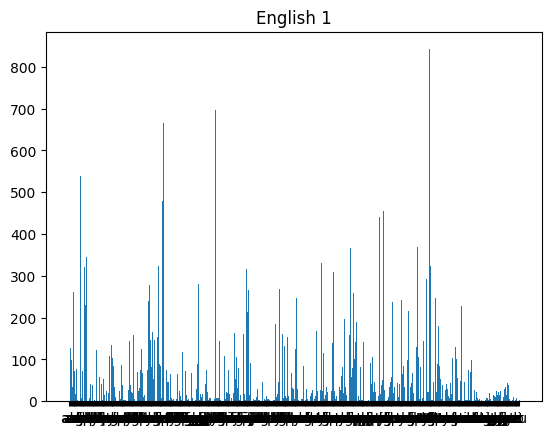

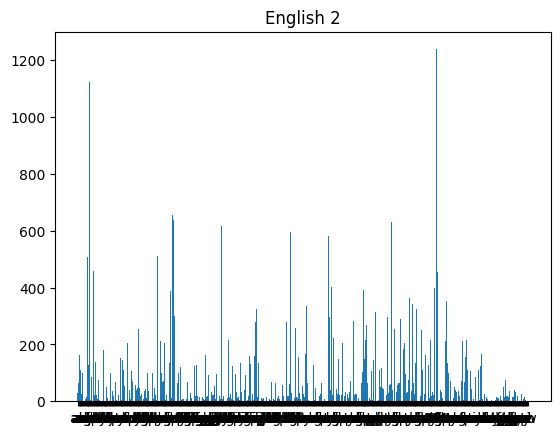

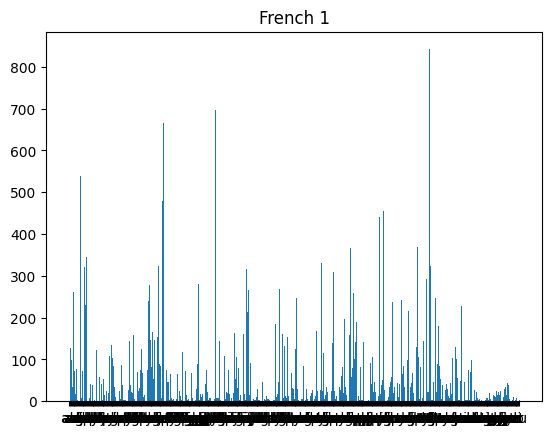

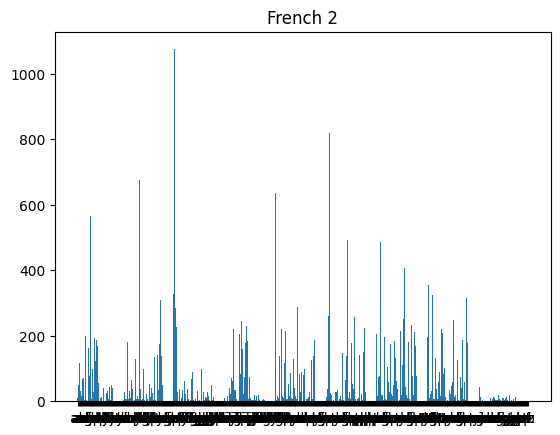

In [18]:
bigram_eng1 = Counter(ngrams(eng1,2)) # bigrams
plothistogram(bigram_eng1)
plt.title('English 1')
plt.show()

bigram_eng2 = Counter(ngrams(eng2,2))
plothistogram(bigram_eng2)
plt.title('English 2')
plt.show()

bigram_fr1 = Counter(ngrams(fr1,2))
plothistogram(bigram_eng1)
plt.title('French 1')
plt.show()

bigram_fr2 = Counter(ngrams(fr2,2))
plothistogram(bigram_fr2)
plt.title('French 2')
plt.show()

Another way to visualize bigrams is to use a 2-dimensional graph.

In [19]:
def plotbihistogram(ngram):
  freq = np.zeros((26,26))
  for ii in range(26):
    for jj in range(26):
      freq[ii,jj] = ngram[(chr(ord('a')+ii), chr(ord('a')+jj))]
  plt.imshow(freq, cmap = 'jet')
  return freq

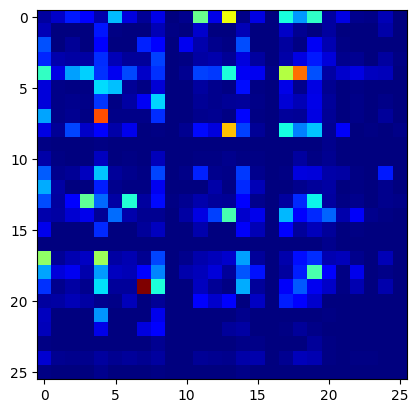

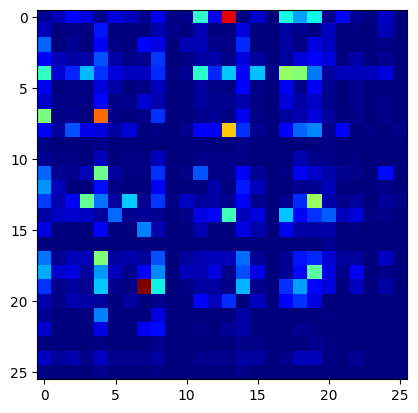

In [20]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

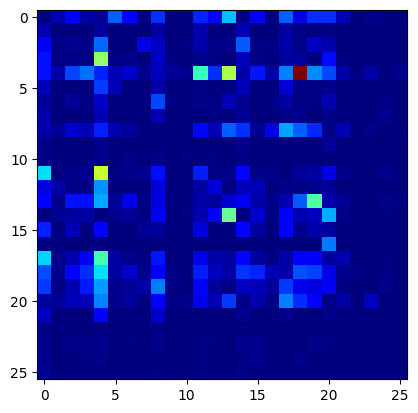

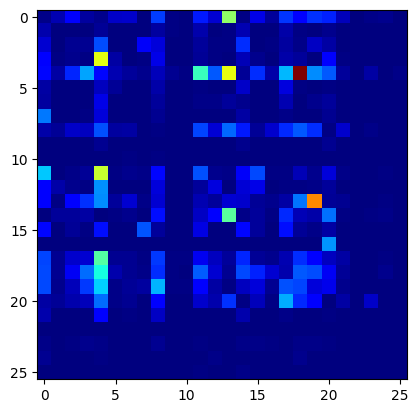

In [21]:
bifr1 = plotbihistogram(bigram_fr1)
plt.show()
bifr2 = plotbihistogram(bigram_fr2)

Let us look at the top 10 ngrams for each text.

In [23]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))     #ord - returns unicode from a given character
                                                #chr -  used to get a string representing of a character which points to a Unicode code integer.
def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()                          #flatten - used to return a copy of a given array in such a way that it is collapsed into one dimension
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [24]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nFrench 1:')
ShowTopN(bifr1)
print('\nFrench 2:')
ShowTopN(bifr2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

French 1:
('e', 's') : 737.0
('l', 'e') : 438.0
('e', 'n') : 409.0
('d', 'e') : 390.0
('o', 'n') : 349.0
('n', 't') : 329.0
('r', 'e') : 317.0
('e', 'l') : 308.0
('l', 'a') : 254.0
('s', 'e') : 254.0

French 2:
('e', 's') : 1075.0
('n', 't') : 820.0
('e', 'n') : 678.0
('d', 'e') : 675.0
('l', 'e') : 635.0
('a', 'n') : 566.0
('o', 'n') : 492.0
('r', 'e') : 486.0
('e', 'l') : 451.0
('s', 'e') : 407.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

Trying with Languages english and spanish and using topics 'pancakes' and 'fruit'

In [40]:
topic1 = 'Pancakes'
topic2 = 'Fruit'

wikipedia.set_lang('en')

eng1 = wikipedia.page(topic1).content
eng2 = wikipedia.page(topic2).content

wikipedia.set_lang('es')

es1 = wikipedia.page(topic1).content
es2 = wikipedia.page(topic2).content

In [38]:
eng1

'A pancake (or hotcake, griddlecake, or flapjack) is a flat cake, often thin and round, prepared from a starch-based batter that may contain eggs, milk and butter and cooked on a hot surface such as a griddle or frying pan, often frying with oil or butter. It is a type of batter bread. Archaeological evidence suggests that pancakes were probably eaten in prehistoric societies.The pancake\'s shape and structure varies worldwide. In the United Kingdom, pancakes are often unleavened and resemble a crêpe. In North America, a leavening agent is used (typically baking powder) creating a thick fluffy pancake. A crêpe is a thin Breton pancake of French origin cooked on one or both sides in a special pan or crepe maker to achieve a lacelike network of fine bubbles. A well-known variation originating from southeast Europe is a palačinke, a thin moist pancake fried on both sides and filled with jam, cream cheese, chocolate, or ground walnuts, but many other fillings—sweet or savoury—can also be u

In [41]:
eng2

'In botany, a fruit is the seed-bearing structure in flowering plants that is formed from the ovary after flowering.\nFruits are the means by which flowering plants (also known as angiosperms) disseminate their seeds. Edible fruits in particular have long propagated using the movements of humans and other animals in a symbiotic relationship that is the means for seed dispersal for the one group and nutrition for the other; in fact, humans and many other animals have become dependent on fruits as a source of food. Consequently, fruits account for a substantial fraction of the world\'s agricultural output, and some (such as the apple and the pomegranate) have acquired extensive cultural and symbolic meanings.\nIn common language usage, fruit normally means the seed-associated fleshy structures (or produce) of plants that typically are sweet or sour and edible in the raw state, such as apples, bananas, grapes, lemons, oranges, and strawberries. In botanical usage, the term fruit also incl

In [42]:
es1

'El panqueque (Arg., Chil., Ec., Per., Ur.), hotcake (Méx.), pancake (CR., Nic., Pan., PR, CC Co.), panqueca (Ven.),[1]\u200b arepuela (Resto de Co.) o tortita (Esp.), es una torta plana, redonda y salada o dulce, cuya masa contiene leche y está levadurizada. En ocasiones también puede incluir especias, esencias o extractos (canela, por ejemplo). Se considera un desayuno típico estadounidense, aunque también se consume internacionalmente en la merienda, como aperitivo o postre.\nAunque también es llamado crêpe o crep, esta es una preparación francesa similar que se diferencia, entre otras cosas, por no contener levadura y cocinarse a fuego lento. Además, el crêpe es más fino y de mayor diámetro.\nExisten muchas variantes en diferentes culturas y países, no solo en los ingredientes sino en la forma de ser servido. Su tiempo de vida es de 3 a 4 días si se guarda en refrigerador, en el congelador dura de 4 a 6 meses.\nEl Martes de Carnaval también se denomina «Martes del Pancaque».\n\n\n=

In [43]:
es2

'Fruit es un programa de ajedrez desarrollado por Fabien Letouzey. En la lista de la Asociación Sueca de Ajedrez por Computadora Swedish Chess Computer Association (SSDF) del 24 de noviembre de 2006, la versión 2.2.1 de Fruit tenía una puntuación de 2842. En la lista CEGT del 24 de enero de 2007, la versión 2.2.1. de Fruit tenía una puntuación Elo de 2776.\nEn el Campeonato del Mundo de Ordenadores de Ajedrez celebrado en Reikiavik en 2005, Fruit obtuvo 8,5 puntos de 11 posibles, concluyendo en segundo lugar tras Zappa. \nHasta la versión 2.1 (Peach - melocotón ), Fruit era un programa en código abierto. Esta versión 2.1 sigue siendo libre y contribuyó notablemente al desarrollo de los programas de ajedrez en los últimos años. Hay quien sigue trabajando en el antiguo código y ha creado variaciones del Fruit original.\n\n\n== Especificaciones técnicas de Fruit 2.1 ==\nFruit utiliza el clásico algoritmo Negascout (PVS) de profudidad reiterativa para atravesar el árbol de variantes. \n\n\

In [45]:
eng1 = cleanup(eng1)
eng2 = cleanup(eng2)
es1 = cleanup(es1)
es2 = cleanup(es2)

In [46]:
eng1

'apancakeorhotcakegriddlecakeorflapjackisaflatcakeoftenthinandroundpreparedfromastarchbasedbatterthatmaycontaineggsmilkandbutterandcookedonahotsurfacesuchasagriddleorfryingpanoftenfryingwithoilorbutteritisatypeofbatterbreadarchaeologicalevidencesuggeststhatpancakeswereprobablyeateninprehistoricsocietiesthepancakesshapeandstructurevariesworldwideintheunitedkingdompancakesareoftenunleavenedandresembleacrpeinnorthamericaaleaveningagentisusedtypicallybakingpowdercreatingathickfluffypancakeacrpeisathinbretonpancakeoffrenchorigincookedononeorbothsidesinaspecialpanorcrepemakertoachievealacelikenetworkoffinebubblesawellknownvariationoriginatingfromsoutheasteuropeisapalainkeathinmoistpancakefriedonbothsidesandfilledwithjamcreamcheesechocolateorgroundwalnutsbutmanyotherfillingssweetorsavourycanalsobeusedcommerciallypreparedpancakemixesareavailableinsomecountrieslikewafflescommerciallypreparedfrozenpancakesareavailablefromcompanieslikeeggowhenbuttermilkisusedinplaceoforinadditiontomilkthepancaked

In [47]:
eng2

'inbotanyafruitistheseedbearingstructureinfloweringplantsthatisformedfromtheovaryafterfloweringfruitsarethemeansbywhichfloweringplantsalsoknownasangiospermsdisseminatetheirseedsediblefruitsinparticularhavelongpropagatedusingthemovementsofhumansandotheranimalsinasymbioticrelationshipthatisthemeansforseeddispersalfortheonegroupandnutritionfortheotherinfacthumansandmanyotheranimalshavebecomedependentonfruitsasasourceoffoodconsequentlyfruitsaccountforasubstantialfractionoftheworldsagriculturaloutputandsomesuchastheappleandthepomegranatehaveacquiredextensiveculturalandsymbolicmeaningsincommonlanguageusagefruitnormallymeanstheseedassociatedfleshystructuresorproduceofplantsthattypicallyaresweetorsourandedibleintherawstatesuchasapplesbananasgrapeslemonsorangesandstrawberriesinbotanicalusagethetermfruitalsoincludesmanystructuresthatarenotcommonlycalledfruitsineverydaylanguagesuchasnutsbeanpodscornkernelstomatoesandwheatgrainsbotanicalvsculinarymanycommonlanguagetermsusedforfruitandseedsdifferfr

In [48]:
es1

'elpanquequeargchilecperurhotcakemxpancakecrnicpanprcccopanquecavenarepuelarestodecootortitaespesunatortaplanaredondaysaladaodulcecuyamasacontienelecheyestlevadurizadaenocasionestambinpuedeincluirespeciasesenciasoextractoscanelaporejemploseconsideraundesayunotpicoestadounidenseaunquetambinseconsumeinternacionalmenteenlameriendacomoaperitivoopostreaunquetambinesllamadocrpeocrepestaesunapreparacinfrancesasimilarquesediferenciaentreotrascosaspornocontenerlevaduraycocinarseafuegolentoademselcrpeesmsfinoydemayordimetroexistenmuchasvariantesendiferentesculturasypasesnosoloenlosingredientessinoenlaformadeserservidosutiempodevidaesdeadassiseguardaenrefrigeradorenelcongeladorduradeameseselmartesdecarnavaltambinsedenominamartesdelpancaqueespaaenespaaselessuelellamartortitasytienenunaconsistenciaesponjosamsgruesaqueloscrepesylacircunferenciaesmspequeaseacompaannormalmentedenatasesuelendenominartortitasconnatayjarabeosiropefresachocolatecarameloetcobiensoloconmermeladasesuelentomardepostreaunqueot

In [49]:
es2

'fruitesunprogramadeajedrezdesarrolladoporfabienletouzeyenlalistadelaasociacinsuecadeajedrezporcomputadoraswedishchesscomputerassociationssdfdeldenoviembredelaversindefruittenaunapuntuacindeenlalistacegtdeldeenerodelaversindefruittenaunapuntuacinelodeenelcampeonatodelmundodeordenadoresdeajedrezcelebradoenreikiavikenfruitobtuvopuntosdeposiblesconcluyendoensegundolugartraszappahastalaversinpeachmelocotnfruiteraunprogramaencdigoabiertoestaversinsiguesiendolibreycontribuynotablementealdesarrollodelosprogramasdeajedrezenlosltimosaoshayquiensiguetrabajandoenelantiguocdigoyhacreadovariacionesdelfruitoriginalespecificacionestcnicasdefruitfruitutilizaelclsicoalgoritmonegascoutpvsdeprofudidadreiterativaparaatravesarelrboldevariantesderivadostogaiiesunderivadocreadoporthomasgakschtieneunmayorconocimientoajedrecsticoyquizunmejoralgoritmodebsquedasebasaenfruityesunprogramalibreygratuitogambitfruitesotroderivadolibredefruitcreadoporryanbentezjuegamsagresivamenteyconocemsajedrezgambitfruitincorporame

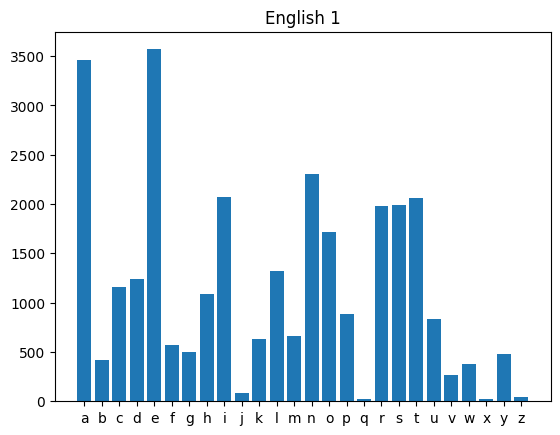

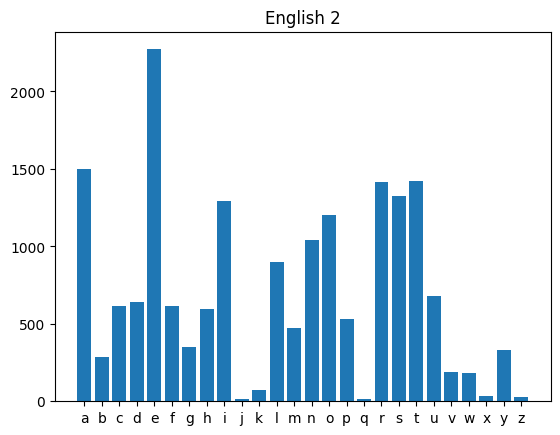

In [50]:
unigram_eng1 = Counter(ngrams(eng1,1))
plothistogram(unigram_eng1)
plt.title('English 1')
plt.show()
unigram_eng2 = Counter(ngrams(eng2,1))
plothistogram(unigram_eng2)
plt.title('English 2')
plt.show()

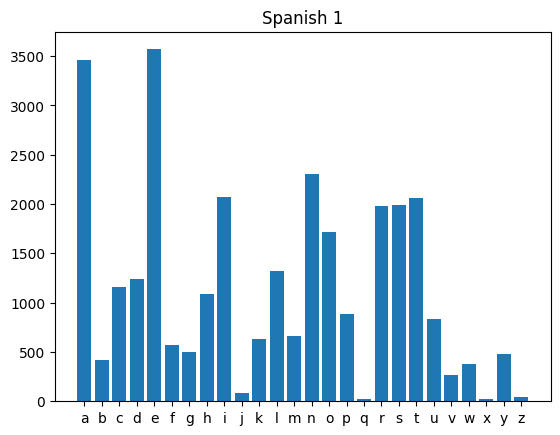

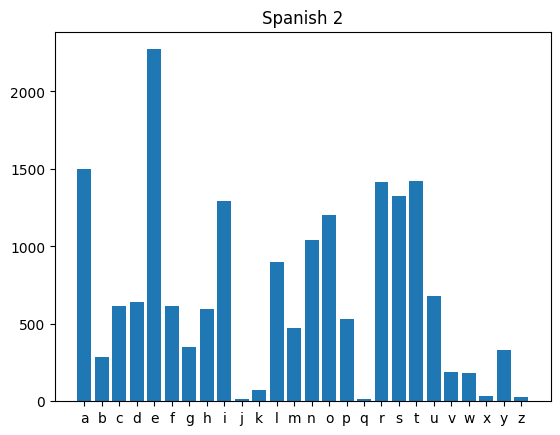

In [51]:
unigram_fr1 = Counter(ngrams(es1,1))
plothistogram(unigram_eng1)
plt.title('Spanish 1')
plt.show()
unigram_fr2 = Counter(ngrams(es2,1))
plothistogram(unigram_eng2)
plt.title('Spanish 2')
plt.show()

There are very few similarities hence using bigrams

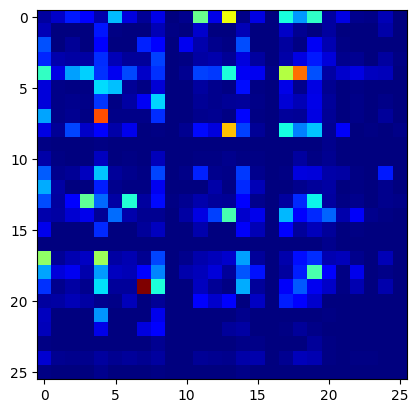

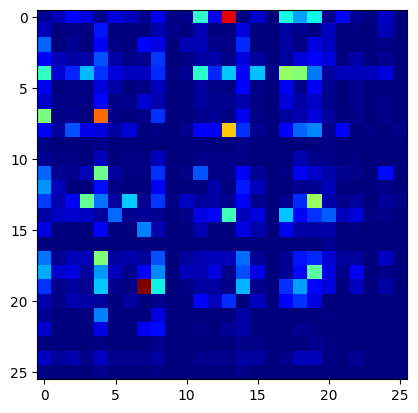

In [52]:
bieng1 = plotbihistogram(bigram_eng1)
plt.show()
bieng2 = plotbihistogram(bigram_eng2)

Since bigram_eng are defined already we aren't doing it anymore. We are just going to define only bigram_es

In [54]:
bigram_es1 = Counter(ngrams(es1,2))

bigram_es2 = Counter(ngrams(es2,2))


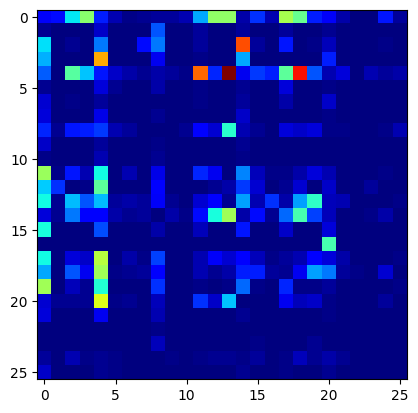

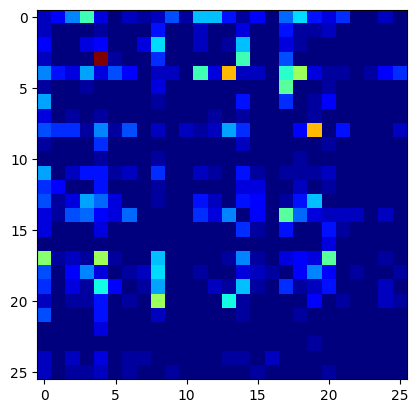

In [57]:
bies1 = plotbihistogram(bigram_es1)
plt.show()
bies2 = plotbihistogram(bigram_es2)

Visualizing Trigrams

In [56]:
trigram_eng1 = Counter(ngrams(eng1,3))
trigram_eng2 = Counter(ngrams(eng2,3))
trigram_es1 = Counter(ngrams(es1,3))
trigram_es2 = Counter(ngrams(es2,3))

In [76]:
def plottrihistogram(ngram):
    freq = np.zeros((26, 26, 26))
    for ii in range(26):
        for jj in range(26):
            for kk in range(26):
                freq[ii, jj, kk] = ngram.get((chr(ord('a') + ii), chr(ord('a') + jj), chr(ord('a') + kk)), 0)

    # Flatten the 3D array to a 2D array
    #Since I was getting a type error I flattened my array
    flat_freq = freq.reshape(26*26, 26)

    plt.imshow(flat_freq, cmap='jet', origin='lower', extent=[0, 26, 0, 26])
    plt.colorbar(label='Frequency')
    plt.xlabel('Third letter (a-z)')
    plt.ylabel('Second letter (a-z)')
    plt.title('Trigram Frequency ')
    plt.show()

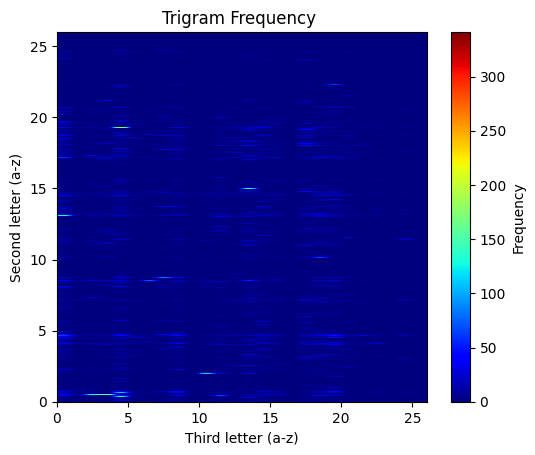

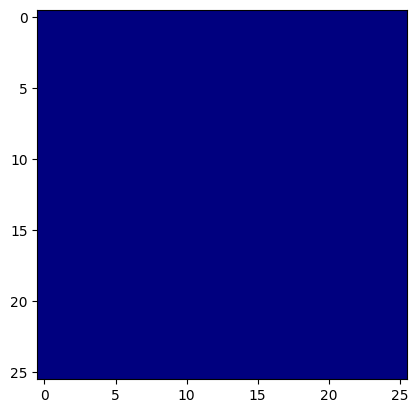

In [77]:
trieng1 = plottrihistogram(trigram_eng1)
plt.show()
trieng2 = plotbihistogram(trigram_eng2)
plt.show()

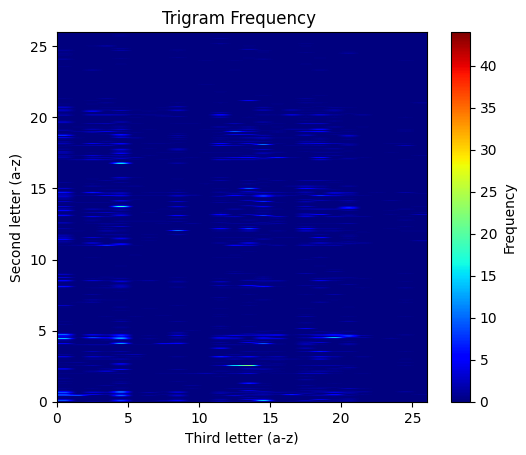

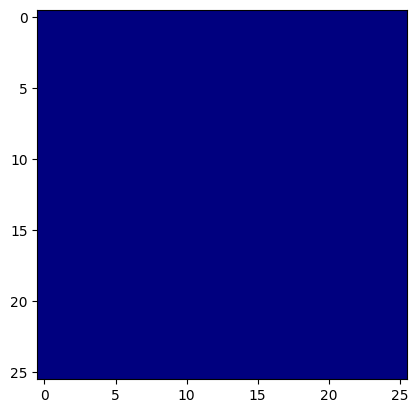

In [78]:
tries1 = plottrihistogram(trigram_es1)
plt.show()
tries2 = plotbihistogram(trigram_es2)
plt.show()

In [81]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j))

def ShowTopN(bifreq, n=10):
  f = bifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')



In [82]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nSpanish 1:')
ShowTopN(bies1)
print('\nSpanish 2:')
ShowTopN(bies2)


English 1:
('t', 'h') : 842.0
('h', 'e') : 697.0
('e', 's') : 665.0
('i', 'n') : 594.0
('a', 'n') : 538.0
('e', 'r') : 478.0
('r', 'e') : 454.0
('r', 'a') : 441.0
('a', 'l') : 404.0
('n', 'd') : 393.0

English 2:
('t', 'h') : 1238.0
('a', 'n') : 1123.0
('h', 'e') : 983.0
('i', 'n') : 863.0
('n', 't') : 664.0
('e', 'r') : 655.0
('e', 's') : 637.0
('r', 'e') : 629.0
('h', 'a') : 618.0
('l', 'e') : 597.0

Spanish 1:
('e', 'n') : 110.0
('e', 's') : 98.0
('c', 'o') : 91.0
('e', 'l') : 88.0
('d', 'e') : 80.0
('u', 'e') : 68.0
('r', 'e') : 63.0
('a', 'r') : 61.0
('o', 'n') : 60.0
('s', 'e') : 60.0

Spanish 2:
('d', 'e') : 35.0
('e', 'n') : 25.0
('i', 't') : 25.0
('e', 's') : 19.0
('u', 'i') : 19.0
('r', 'e') : 19.0
('r', 'a') : 18.0
('o', 'r') : 16.0
('f', 'r') : 16.0
('r', 'u') : 16.0


In [85]:
from IPython.core.debugger import set_trace

def ind2tup(ind):
  ind = int(ind)
  i = int(ind/26)
  j = int(ind%26)
  k = int(ind%26)
  return (chr(ord('a')+i), chr(ord('a')+j), chr(ord('a')+k),)

def ShowTopN(trifreq, n=10):
  f = trifreq.flatten()
  arg = np.argsort(-f)
  for ii in range(n):
    print(f'{ind2tup(arg[ii])} : {f[arg[ii]]}')

In [86]:
print('\nEnglish 1:')
ShowTopN(bieng1)
print('\nEnglish 2:')
ShowTopN(bieng2)
print('\nSpanish 1:')
ShowTopN(bies1)
print('\nSpanish 2:')
ShowTopN(bies2)


English 1:
('t', 'h', 'h') : 842.0
('h', 'e', 'e') : 697.0
('e', 's', 's') : 665.0
('i', 'n', 'n') : 594.0
('a', 'n', 'n') : 538.0
('e', 'r', 'r') : 478.0
('r', 'e', 'e') : 454.0
('r', 'a', 'a') : 441.0
('a', 'l', 'l') : 404.0
('n', 'd', 'd') : 393.0

English 2:
('t', 'h', 'h') : 1238.0
('a', 'n', 'n') : 1123.0
('h', 'e', 'e') : 983.0
('i', 'n', 'n') : 863.0
('n', 't', 't') : 664.0
('e', 'r', 'r') : 655.0
('e', 's', 's') : 637.0
('r', 'e', 'e') : 629.0
('h', 'a', 'a') : 618.0
('l', 'e', 'e') : 597.0

Spanish 1:
('e', 'n', 'n') : 110.0
('e', 's', 's') : 98.0
('c', 'o', 'o') : 91.0
('e', 'l', 'l') : 88.0
('d', 'e', 'e') : 80.0
('u', 'e', 'e') : 68.0
('r', 'e', 'e') : 63.0
('a', 'r', 'r') : 61.0
('o', 'n', 'n') : 60.0
('s', 'e', 'e') : 60.0

Spanish 2:
('d', 'e', 'e') : 35.0
('e', 'n', 'n') : 25.0
('i', 't', 't') : 25.0
('e', 's', 's') : 19.0
('u', 'i', 'i') : 19.0
('r', 'e', 'e') : 19.0
('r', 'a', 'a') : 18.0
('o', 'r', 'r') : 16.0
('f', 'r', 'r') : 16.0
('r', 'u', 'u') : 16.0


We observe that the trigrams are also similar for different topics and different for languages. Thus, the trigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

 we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams) or 26*26*26 dimensions (trigrams).

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [87]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Extract a subset of the data for our experiment:

In [88]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

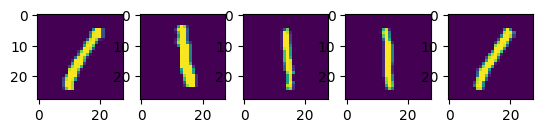

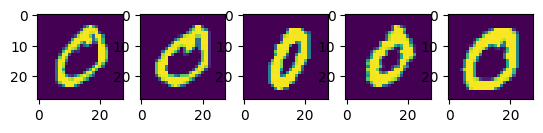

In [89]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [90]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

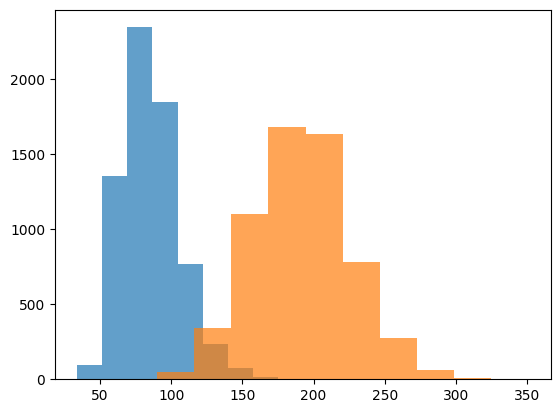

In [91]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [92]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

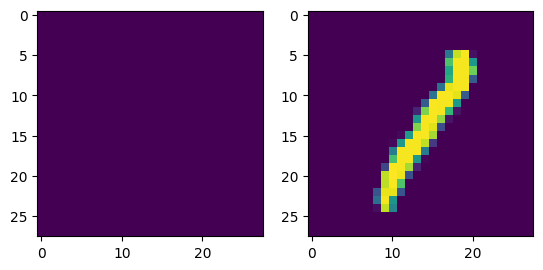

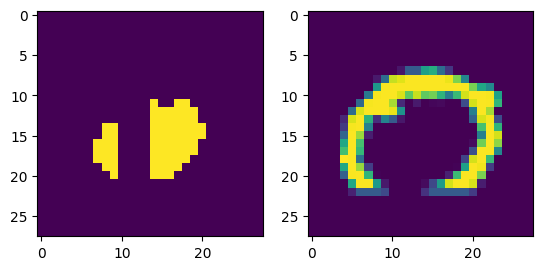

In [93]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

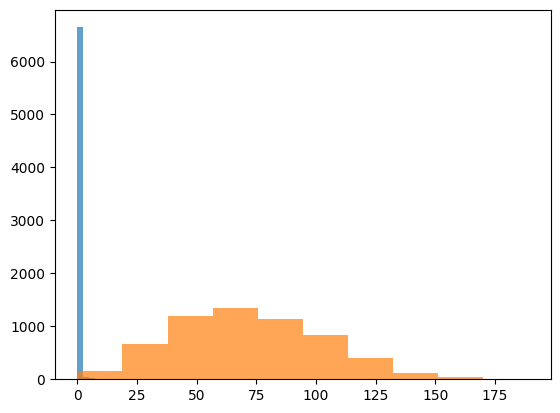

In [94]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [95]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

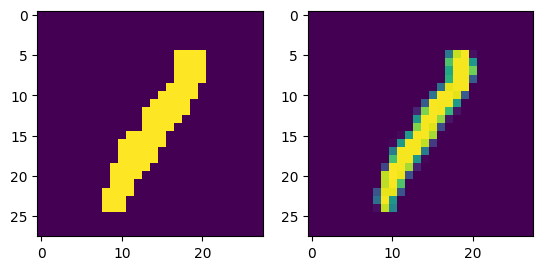

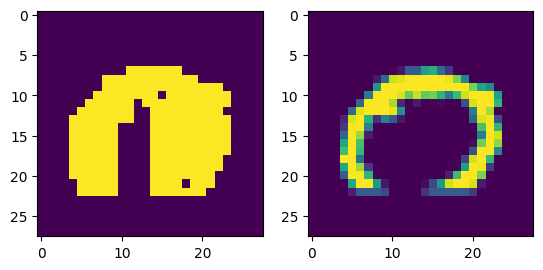

In [96]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

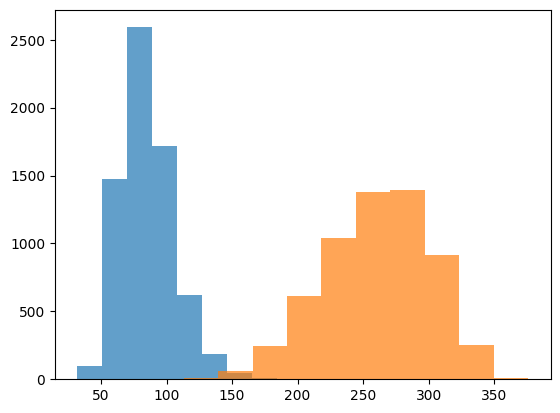

In [97]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [98]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

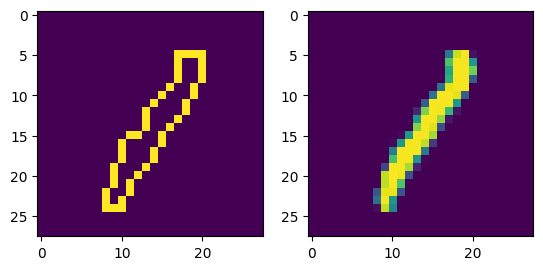

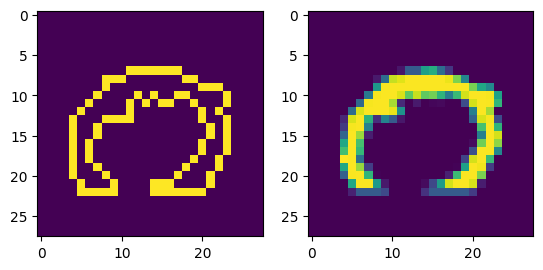

In [99]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

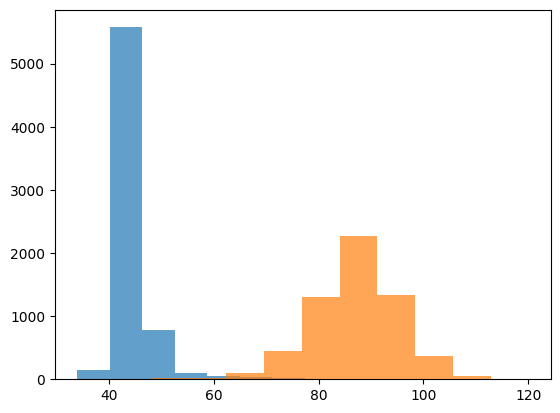

In [100]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

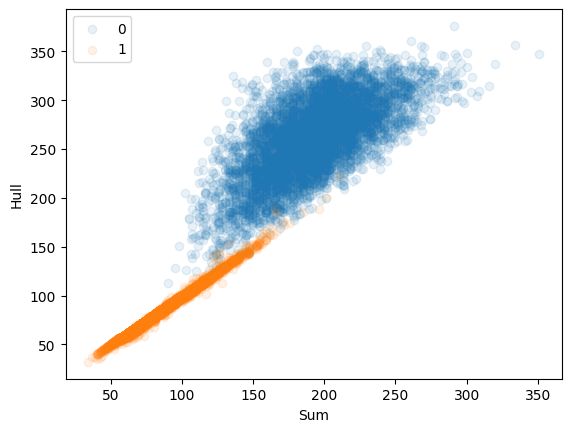

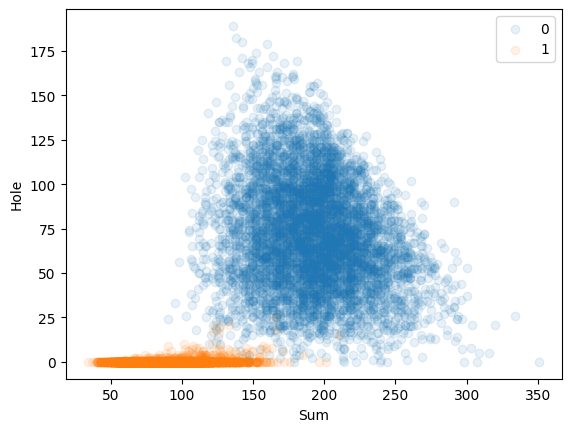

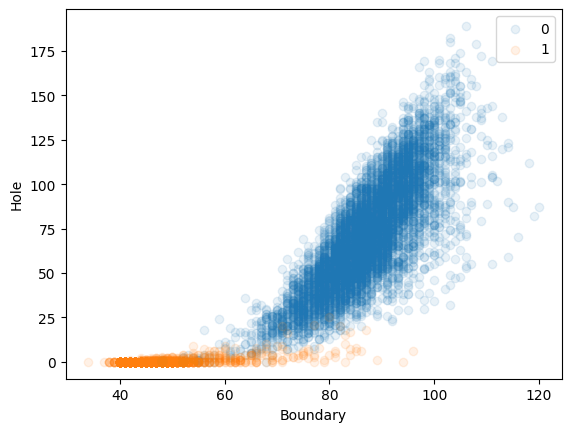

In [101]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [102]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?

Answers to the above questions:

1. Hole and Boundary is the best combination of features
2. Scatter plots, Heat Maps, Histograms can be used to visualize when there are more features.
3. Relationship between pixels can be considered .
4. Yes, these features work for other classes too.
5. Due to overlapping of points, interpretation becomes difficult

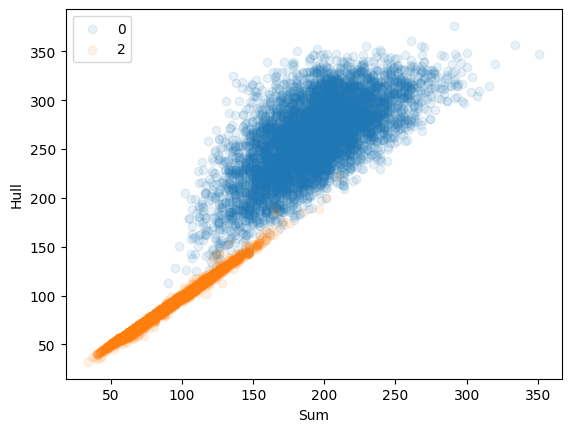

In [103]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','2'])
plt.show()

In [108]:
no2 = train_X[train_y==2,:,:]

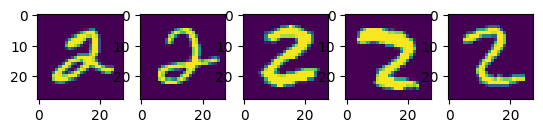

In [109]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no2[ii,:,:])
plt.show()

In [112]:
sum2 = np.sum(no2>0, (1,2))

In [113]:
hull2 = np.array([getHullPixels(i).sum() for i in no2])

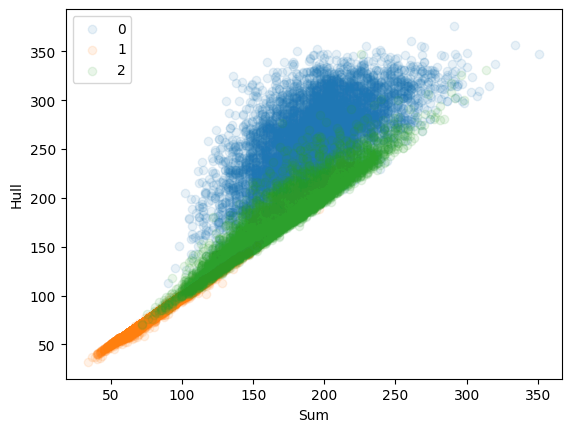

In [114]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.scatter(sum2, hull2, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1','2'])
plt.show()